<a href="https://colab.research.google.com/github/Shruti-425/AIML/blob/main/experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded =files.upload()

Saving iris.csv to iris.csv


In [3]:
from google.colab import drive
file_path = '/content/drive/My Drive/iris.csv'

In [4]:
file_path = 'iris.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

In [5]:
# Display structure of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.00000

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Example handling of missing values (imputation with median)
# Only include numerical features for median calculation
numeric_features = df.select_dtypes(include=np.number).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
# Assuming your numerical features are 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
# Replace these with the actual numerical columns from your dataset if different.
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

2-

In [13]:
from sklearn.model_selection import train_test_split

# Now you can use 'dataset' to extract features
# Assuming your target column is named something else, e.g., 'species'
# Replace 'species' with the actual target column name if different.
X = df.drop('species', axis=1)
y = df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Replace with optimal k
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

3-

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example for Logistic Regression:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions):.2f}")
print(f"Precision: {precision_score(y_test, logistic_predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, logistic_predictions, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, logistic_predictions, average='weighted'):.2f}")

Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


4-

In [18]:
# Example for Logistic Regression
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, logistic_predictions))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



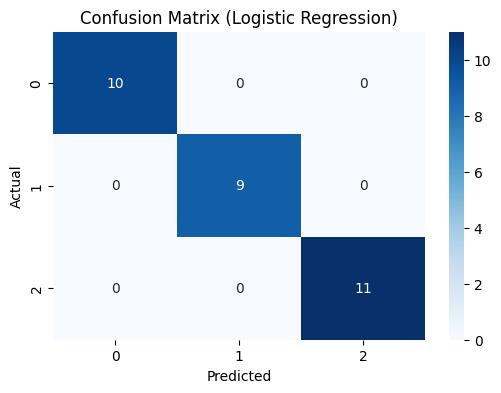

In [19]:
# Example for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN'],
    'Accuracy': [accuracy_score(y_test, logistic_predictions),
                 accuracy_score(y_test, tree_predictions),
                 accuracy_score(y_test, knn_predictions)],
    'Precision': [precision_score(y_test, logistic_predictions, average='weighted'),
                  precision_score(y_test, tree_predictions, average='weighted'),
                  precision_score(y_test, knn_predictions, average='weighted')],
    'Recall': [recall_score(y_test, logistic_predictions, average='weighted'),
               recall_score(y_test, tree_predictions, average='weighted'),
               recall_score(y_test, knn_predictions, average='weighted')],
    'F1-Score': [f1_score(y_test, logistic_predictions, average='weighted'),
                 f1_score(y_test, tree_predictions, average='weighted'),
                 f1_score(y_test, knn_predictions, average='weighted')]
})
print("\nModel Comparison:")
print(results)


Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2                  KNN       1.0        1.0     1.0       1.0
